# Importing Libraries

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pickle

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [3]:
train_df=pd.read_csv("finsecure_train.csv")
test_df=pd.read_csv("finsecure_test.csv")

print("Training Data Shape:", train_df.shape)
print("\nFirst 5 rows of training data:")
train_df.head()

Training Data Shape: (9840, 32)

First 5 rows of training data:


,Index,TimeElapsed,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,Amount,Status
0,1,137696.0,2.065791,-0.065613,-1.130470,0.384728,-0.075736,-1.128309,0.186186,-0.326402,0.551486,0.071902,-0.873314,0.389151,0.088783,0.267724,0.051437,-0.061622,-0.341495,-0.820560,0.200598,-0.212461,-0.296821,-0.728288,0.318849,-0.110236,-0.280067,0.204709,-0.071613,-0.060814,5.37,0
1,2,161961.0,2.095037,-1.175449,-1.520765,-0.918477,-0.481096,-0.488949,-0.525732,-0.273566,-0.063873,0.759856,-1.797146,-0.866861,0.405156,-0.354675,-0.022158,1.091197,-0.107480,-0.757384,0.795549,0.181253,0.565300,1.580267,-0.318744,-0.901549,0.403101,0.302833,-0.034751,-0.058508,104.40,0
2,3,153055.0,-0.584961,-4.600653,-2.430893,0.969314,-0.657150,2.225950,0.971258,0.299291,1.152448,-0.865479,0.643267,0.995614,-0.669748,0.648798,0.435696,-0.542873,0.119842,-0.757992,-0.603119,2.248672,0.461198,-1.349655,-0.676798,-0.975495,-0.972022,-1.120256,-0.154142,0.168297,1279.42,0
3,4,135992.0,2.096629,-0.005357,-1.977506,0.300357,0.555053,-0.520263,0.044011,-0.075661,0.797991,-0.335600,-1.314290,-0.957375,-1.612116,-0.518824,0.487759,0.502801,0.429880,0.001930,0.200395,-0.250111,-0.413232,-1.169915,0.296059,-0.117854,-0.260555,0.216644,-0.072525,-0.039778,5.49,0
4,5,156412.0,1.930480,-0.293869,-0.260770,0.479326,-0.654627,-0.725121,-0.334856,-0.164048,1.102093,-0.209092,-0.605723,1.144234,1.245244,-0.257659,0.527831,0.138758,-0.603407,-0.334044,-0.095873,-0.098033,-0.149455,-0.283249,0.335576,0.034443,-0.401095,-0.631618,0.037459,-0.023239,34.99,0


In [4]:
print("Testing Data Shape:", test_df.shape)
print("\nFirst 5 rows of testing data:")
test_df.head()

Testing Data Shape: (6560, 31)

First 5 rows of testing data:


,Index,TimeElapsed,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,Amount
0,1,162693.0,2.104774,0.140612,-1.934892,0.279430,0.724530,-0.477268,0.165560,-0.180432,0.516740,-0.388601,-0.997106,0.031812,0.247469,-0.889824,0.283221,0.415079,0.323476,-0.227015,0.188957,-0.138074,-0.393971,-1.015716,0.276825,-0.067104,-0.196325,0.210785,-0.059701,-0.036394,1.98
1,2,90085.0,-1.376939,1.414134,-1.391369,-0.299312,1.219036,0.626913,-0.075954,0.996870,0.732388,-1.449992,1.947084,-1.678410,1.872420,1.306923,0.008918,-0.277804,1.928200,0.430611,-0.880894,-0.322090,0.328227,1.172930,-0.287420,-1.741269,-0.610010,-0.095282,0.042049,0.052398,22.49
2,3,74839.0,-0.606393,1.269511,0.218814,-0.415976,0.586030,0.284010,0.226725,0.616568,-0.689347,-0.564948,-0.225548,0.137278,0.284057,0.002446,0.293227,1.211234,-0.696036,0.974640,0.844511,0.074814,-0.281852,-0.915233,-0.170885,-1.455177,0.062658,0.164310,0.111451,0.008747,9.42
3,4,145288.0,-0.549750,0.198439,-0.708078,-2.042136,1.402134,-0.630856,0.456403,-0.341079,-0.902612,0.584973,0.550115,-0.948392,-0.644923,-1.428510,-1.146831,1.306669,0.625490,-0.440405,1.069339,0.004095,-0.027659,0.148023,-0.308642,-0.001331,-0.655368,-0.467096,-0.037675,0.036312,10.00
4,5,61600.0,1.154670,-0.158841,0.653590,0.408600,-0.518939,-0.136887,-0.328912,-0.061967,0.367292,-0.165987,-0.880670,0.560167,1.549028,-0.299369,1.339456,0.854272,-0.942832,0.141282,-0.086439,0.157735,-0.005702,-0.083031,-0.113571,-0.395754,0.279485,0.433003,-0.012163,0.031846,71.21


# Exploratory Data Analysis

Missing values in training data:
 0

Class Distribution:
0    9545
1     295
Name: Status, dtype: int64


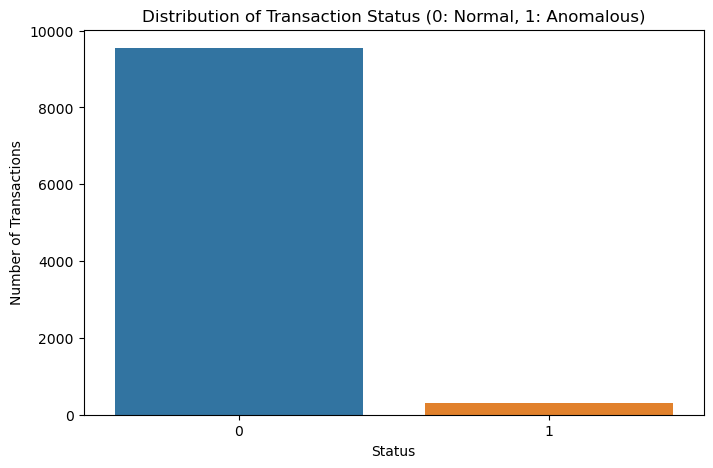


Description of 'Amount' and 'TimeElapsed':


,TimeElapsed,Amount
count,9840.000000,9840.000000
mean,94877.251931,84.800888
std,47557.118344,213.586895
min,0.000000,0.000000
25%,54215.250000,5.000000
50%,84877.000000,20.950000
75%,139306.000000,74.955000
max,172768.000000,3974.580000


In [5]:
print("Missing values in training data:\n", train_df.isnull().sum().sum())

status_counts = train_df['Status'].value_counts()
print("\nClass Distribution:")
print(status_counts)

plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=train_df)
plt.title('Distribution of Transaction Status (0: Normal, 1: Anomalous)')
plt.ylabel('Number of Transactions')
plt.show()

print("\nDescription of 'Amount' and 'TimeElapsed':")
train_df[['TimeElapsed', 'Amount']].describe()

# Preprocessing

In [6]:
features = [col for col in train_df.columns if col not in ['Index', 'Status']]
X = train_df[features]
y = train_df['Status']

X_submission = test_df[features]

# Fit the scaler on the training data and transform it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_submission_scaled = scaler.transform(X_submission)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_submission_scaled = pd.DataFrame(X_submission_scaled, columns=features)

print("Scaled Data Shape:", X_scaled.shape)
print("Data has been scaled. First 10 rows of scaled training data:")
X_scaled.head(10)


Scaled Data Shape: (9840, 30)
Data has been scaled. First 10 rows of scaled training data:


,TimeElapsed,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,Amount
0,0.900410,0.926345,-0.106805,-0.405587,0.153313,-0.002160,-0.803027,0.183091,-0.213457,0.501373,0.139951,-0.789558,0.348744,0.103263,0.286580,0.052547,0.036673,-0.089587,-0.740358,0.209751,-0.303318,-0.325490,-0.965203,0.489402,-0.174439,-0.510243,0.414810,-0.155772,-0.197785,-0.371909
1,1.410665,0.938665,-0.716946,-0.578331,-0.630245,-0.242777,-0.326813,-0.180191,-0.180945,0.004336,0.553440,-1.530613,-0.437889,0.422911,-0.100476,-0.027417,0.950782,0.040462,-0.678479,0.915442,0.226589,0.545166,2.079997,-0.492715,-1.476879,0.776483,0.617428,-0.076773,-0.190679,0.091766
2,1.223386,-0.190323,-2.599976,-0.981154,0.504799,-0.347280,1.695326,0.583701,0.171553,0.986781,-0.423453,0.426974,0.728568,-0.663118,0.523561,0.470063,-0.344927,0.166792,-0.679074,-0.743565,3.009176,0.440033,-1.784844,-1.044245,-1.598590,-1.813518,-2.321135,-0.332637,0.507970,5.593413
3,0.864578,0.939336,-0.073679,-0.780485,0.102585,0.372269,-0.350137,0.110541,-0.059168,0.700479,-0.104974,-1.143288,-0.494577,-1.615238,-0.202557,0.526632,0.484223,0.339090,0.065250,0.209510,-0.353993,-0.443054,-1.547751,0.454297,-0.186979,-0.473492,0.439456,-0.157726,-0.132985,-0.371347
4,1.293978,0.869343,-0.232291,-0.020659,0.210191,-0.345782,-0.502721,-0.082789,-0.113555,0.946109,-0.028938,-0.574908,0.821648,1.271692,-0.040145,0.570172,0.195561,-0.235140,-0.263828,-0.141904,-0.149307,-0.176666,-0.378155,0.515168,0.063690,-0.738195,-1.312137,0.077977,-0.082036,-0.233223
5,-0.275015,-0.331420,-0.266724,0.593931,-1.577975,-0.553082,-0.363752,-0.138104,0.226998,-2.294346,0.473045,0.355671,-0.065709,0.846806,0.100264,-0.904737,0.177210,0.123192,0.873786,-0.572130,-0.321531,0.122292,0.590170,-0.244839,0.020548,0.567777,-0.385108,-0.114937,-0.047997,-0.094584
6,0.782546,-0.413894,0.886845,-0.597847,-1.058485,0.984505,-0.780310,0.800423,0.045880,-0.297316,-0.553745,-1.337715,-0.615684,-1.362186,-0.035584,-0.514070,0.685785,0.142242,0.251791,-1.577794,-0.441640,0.058693,-0.053767,-0.534130,-0.104050,0.575734,0.763833,-0.603593,0.434433,-0.369615
7,-0.130487,-1.569930,1.376711,-2.235203,1.993985,-0.358013,-1.381500,-1.591286,-0.619186,-0.887581,-2.269138,3.325396,-4.028928,0.019246,-6.072900,2.681903,-4.434296,-3.449869,-1.737073,3.522117,-0.257780,1.654864,1.031065,0.103641,1.289109,-1.608491,-0.021958,-2.286241,5.452114,-0.391527
8,-0.742582,-0.103731,0.524678,0.700914,-0.171179,0.179584,-0.403894,0.471060,-0.059750,-0.325533,-0.104143,-0.667167,0.213192,0.869286,0.099847,0.870915,0.331295,-0.242177,-0.209494,0.204649,0.202201,-0.279683,-0.831390,-0.138166,-0.180931,-0.175389,0.197849,0.573895,0.351828,-0.376029
9,-0.381293,-0.124808,0.217973,0.008618,-0.022982,1.643616,2.608176,0.076723,0.572720,-0.521160,0.184459,-0.231833,-0.052839,0.027388,0.387684,1.559437,0.113948,-0.223558,0.448025,1.260518,0.580692,-0.183478,-0.813874,0.038417,1.591465,0.302872,-0.826566,0.635408,0.318262,-0.233645


# Train-Validation Split

We split our training data into a training subset and a validation subset (80/20 split). 

This allows us to train the models and then evaluate their performance on unseen data to choose the best one, without touching the final test set.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Training split shape:", X_train.shape)
print("Validation split shape:", X_val.shape)

Training split shape: (7872, 30)
Validation split shape: (1968, 30)


# Initial Model Training and Validation

In [8]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"--- Training {name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print(f"Validation Results for {name}:")
    print(classification_report(y_val, y_pred, target_names=['Normal (0)', 'Anomalous (1)']))
    print("-" * 50 + "\n")

--- Training Decision Tree ---
Validation Results for Decision Tree:
               precision    recall  f1-score   support

   Normal (0)       0.99      1.00      0.99      1909
Anomalous (1)       0.84      0.81      0.83        59

     accuracy                           0.99      1968
    macro avg       0.92      0.90      0.91      1968
 weighted avg       0.99      0.99      0.99      1968

--------------------------------------------------

--- Training KNN ---
Validation Results for KNN:
               precision    recall  f1-score   support

   Normal (0)       0.99      1.00      1.00      1909
Anomalous (1)       0.96      0.73      0.83        59

     accuracy                           0.99      1968
    macro avg       0.97      0.86      0.91      1968
 weighted avg       0.99      0.99      0.99      1968

--------------------------------------------------

--- Training Gaussian NB ---
Validation Results for Gaussian NB:
               precision    recall  f1-score   

We observe that Random Forest provides a very strong balance of precision and recall for the 'Anomalous (1)' class, resulting in a high F1-score, making it the best choice for further optimization.

# Hyperparameter Tuning with Random Forest

In [9]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

print("--- Starting Hyperparameter Tuning for Random Forest ---")
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("\nBest Parameters Found:", grid_search.best_params_)

print("\nValidation Results for Tuned Random Forest:")
y_pred_tuned = best_rf.predict(X_val)
print(classification_report(y_val, y_pred_tuned, target_names=['Normal (0)', 'Anomalous (1)']))

--- Starting Hyperparameter Tuning for Random Forest ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A Nu


Best Parameters Found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Validation Results for Tuned Random Forest:
               precision    recall  f1-score   support

   Normal (0)       0.99      1.00      1.00      1909
Anomalous (1)       0.96      0.81      0.88        59

     accuracy                           0.99      1968
    macro avg       0.98      0.91      0.94      1968
 weighted avg       0.99      0.99      0.99      1968



# Final Model Training and Submission File Generation

In [10]:
final_model = grid_search.best_estimator_

final_model.fit(X_scaled, y)

print("--- Generating predictions for the test set ---")
final_predictions = final_model.predict(X_submission_scaled)

submission_df = pd.DataFrame({
    "Index": test_df["Index"],
    "Status": final_predictions
})

submission_df.to_csv("submission_1.csv", index=False)

print("\nSubmission file 'submission_optimized_RF.csv' has been created successfully!")
submission_df.head()

--- Generating predictions for the test set ---

Submission file 'submission_optimized_RF.csv' has been created successfully!


,Index,Status
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
